# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base url
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# List of city data
cityData = []

# Grouping variables
# Group
set_count = 1
# Record within group
record = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for i, city in enumerate(cities):
    # group the cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record = 1
        
    # Output the record and group being processed
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    # Increase record number in the set
    record += 1
    
    # Create URL that includes city
    cityURL = url + city
    
    # Call the OpenWeather API
    try:
        cityWeather = requests.get(cityURL).json()
        
        # Parse out data
        lat = cityWeather["coord"]["lat"]
        lng = cityWeather["coord"]["lon"]
        maxTemp = cityWeather["main"]["temp_max"]
        humidity = cityWeather["main"]["humidity"]
        cloudiness = cityWeather["clouds"]["all"]
        windspeed = cityWeather["wind"]["speed"]
        country = cityWeather["sys"]["country"]
        date = cityWeather["dt"]
        
        cityData.append({"City": city,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": maxTemp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": windspeed,
                         "Country": country, 
                        "Date": date})
    except:
        print(f"{city} not found. Skipping...")
        pass

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | fort nelson
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | zhigansk
Processing Record 6 of Set 1 | mudyuga
mudyuga not found. Skipping...
Processing Record 7 of Set 1 | taolanaro
taolanaro not found. Skipping...
Processing Record 8 of Set 1 | mangaluru
Processing Record 9 of Set 1 | sao caetano de odivelas
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | itaituba
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | hay river
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | attawapiskat
attawapiskat not found. Skipping...
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | avarua
Processing

Processing Record 34 of Set 4 | sao filipe
Processing Record 35 of Set 4 | longford
Processing Record 36 of Set 4 | sao geraldo do araguaia
Processing Record 37 of Set 4 | macaboboni
macaboboni not found. Skipping...
Processing Record 38 of Set 4 | palabuhanratu
palabuhanratu not found. Skipping...
Processing Record 39 of Set 4 | harbour breton
Processing Record 40 of Set 4 | vostok
Processing Record 41 of Set 4 | nyaunglebin
Processing Record 42 of Set 4 | kosh-agach
Processing Record 43 of Set 4 | labutta
labutta not found. Skipping...
Processing Record 44 of Set 4 | ratnagiri
Processing Record 45 of Set 4 | srednekolymsk
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | tahoua
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | torbay
Processing Record 50 of Set 4 | sola
Processing Record 1 of Set 5 | ciras
ciras not found. Skipping...
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | ribeira grande
Processing Record 

Processing Record 15 of Set 8 | nautla
Processing Record 16 of Set 8 | rocha
Processing Record 17 of Set 8 | obarsia-closani
obarsia-closani not found. Skipping...
Processing Record 18 of Set 8 | ballina
Processing Record 19 of Set 8 | varkkallai
Processing Record 20 of Set 8 | astorga
Processing Record 21 of Set 8 | jambi
Processing Record 22 of Set 8 | kodinsk
Processing Record 23 of Set 8 | faya
Processing Record 24 of Set 8 | ocampo
Processing Record 25 of Set 8 | garden city
Processing Record 26 of Set 8 | ternate
Processing Record 27 of Set 8 | diffa
Processing Record 28 of Set 8 | banka
Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | mezen
Processing Record 31 of Set 8 | oistins
Processing Record 32 of Set 8 | ghanzi
Processing Record 33 of Set 8 | roma
Processing Record 34 of Set 8 | windhoek
Processing Record 35 of Set 8 | quatre cocos
Processing Record 36 of Set 8 | batemans bay
Processing Record 37 of Set 8 | touros
Processing Record 38 of Set 8

Processing Record 46 of Set 11 | semey
Processing Record 47 of Set 11 | lima
Processing Record 48 of Set 11 | shizunai
Processing Record 49 of Set 11 | bandar
Processing Record 50 of Set 11 | loding
Processing Record 1 of Set 12 | katakwi
Processing Record 2 of Set 12 | zubtsov
Processing Record 3 of Set 12 | santa cruz
Processing Record 4 of Set 12 | harlingen
Processing Record 5 of Set 12 | jumla
Processing Record 6 of Set 12 | olafsvik
Processing Record 7 of Set 12 | salinopolis
Processing Record 8 of Set 12 | novikovo
Processing Record 9 of Set 12 | kamaishi
Processing Record 10 of Set 12 | vila velha
Processing Record 11 of Set 12 | talara
Processing Record 12 of Set 12 | kamenskoye
kamenskoye not found. Skipping...
Processing Record 13 of Set 12 | hami
Processing Record 14 of Set 12 | galesong
Processing Record 15 of Set 12 | longavi
Processing Record 16 of Set 12 | bukachacha
Processing Record 17 of Set 12 | odienne
Processing Record 18 of Set 12 | nishihara
Processing Record 19

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creates a data frame out of the raw data, and exports it as a csv
cityData_df = pd.DataFrame(cityData)
cityData_df.to_csv(output_data_file, index=False)

In [6]:
# Displays the data frame
cityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,78.58,70,99,16.15,PF,1619286557
1,fort nelson,58.8053,-122.7002,37.40,44,20,6.91,CA,1619286619
2,albany,42.6001,-73.9662,69.01,18,57,5.99,US,1619286342
3,chuy,-33.6971,-53.4616,71.82,69,100,7.20,UY,1619286620
4,zhigansk,66.7697,123.3711,33.19,98,100,10.04,RU,1619286952
...,...,...,...,...,...,...,...,...,...
548,erattupetta,9.7000,76.7833,78.80,83,75,2.35,IN,1619287057
549,pangoa,-12.1167,-73.0000,80.49,72,43,3.15,PE,1619287057
550,port blair,11.6667,92.7500,81.93,75,35,7.11,IN,1619286591
551,parrita,9.5201,-84.3225,82.40,50,20,10.36,CR,1619287057


In [7]:
cityData_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.973515,15.377058,61.729114,67.822785,56.141049,8.068246,1.619287e+09
std,33.298509,91.377885,20.763552,22.987577,37.052670,5.330802,2.155794e+02
min,-54.800000,-179.166700,-15.030000,4.000000,0.000000,0.310000,1.619286e+09
25%,-8.466700,-68.514500,47.010000,54.000000,20.000000,4.000000,1.619287e+09
50%,22.933300,19.234500,64.400000,73.000000,71.000000,6.910000,1.619287e+09
75%,47.971400,96.733300,78.800000,87.000000,90.000000,10.380000,1.619287e+09
max,78.218600,178.416700,109.400000,100.000000,100.000000,28.770000,1.619287e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_humidity = cityData_df.index[cityData_df["Humidity"] >= 100].tolist()
index_humidity

[9, 24, 48, 111, 138, 142, 157, 366, 407, 436, 443, 502, 536]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityData_df.drop(index_humidity)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,78.58,70,99,16.15,PF,1619286557
1,fort nelson,58.8053,-122.7002,37.40,44,20,6.91,CA,1619286619
2,albany,42.6001,-73.9662,69.01,18,57,5.99,US,1619286342
3,chuy,-33.6971,-53.4616,71.82,69,100,7.20,UY,1619286620
4,zhigansk,66.7697,123.3711,33.19,98,100,10.04,RU,1619286952


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

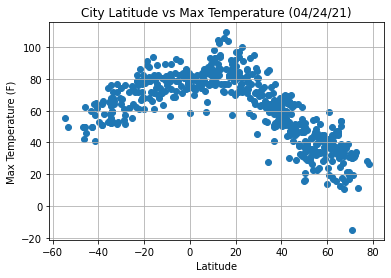

In [10]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Max Temp"])
plt.title(f"City Latitude vs Max Temperature ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/temp_lat.png")
plt.show()

## Latitude vs. Humidity Plot

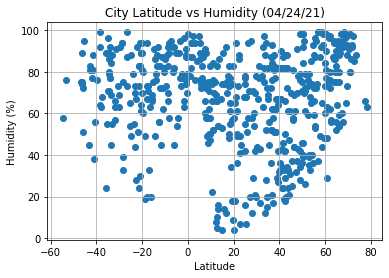

In [11]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Humidity"])
plt.title(f"City Latitude vs Humidity ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/hum_lat.png")
plt.show()

## Latitude vs. Cloudiness Plot

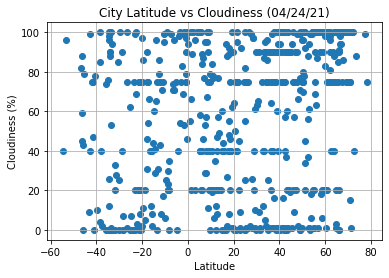

In [12]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Cloudiness"])
plt.title(f"City Latitude vs Cloudiness ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/cloud_lat.png")
plt.show()

## Latitude vs. Wind Speed Plot

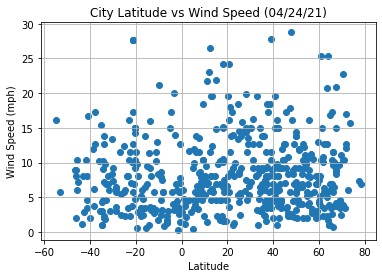

In [13]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Wind Speed"])
plt.title(f"City Latitude vs Wind Speed ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/speed_lat.png")
plt.show()

## Linear Regression

In [14]:
# Divides the data frames into northern and souther hemispheres
north_hem = clean_city_data.loc[clean_city_data["Lat"] > 0]
south_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Establish y values to find St. Pearson Correlation Coefficient for Latitude for Hemispheres
north_lat = north_hem["Lat"]
south_lat = south_hem["Lat"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.86


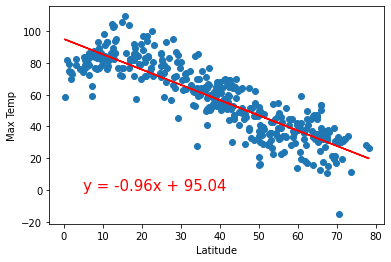

In [15]:
# Establish x value and find St. Pearson Correlation Coefficient for Max Temp
north_temp = north_hem["Max Temp"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_temp)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Max Temp"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation, (5,0), fontsize=15, color="r")
plt.savefig("../Images/north_temp_lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.74


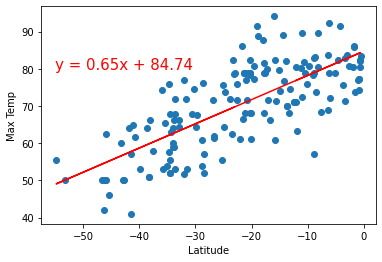

In [16]:
# Establish x value and find St. Pearson Correlation Coefficient for Max Temp
south_temp = south_hem["Max Temp"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_temp)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Max Temp"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation, (-55,80), fontsize=15, color="r")
plt.savefig("../Images/south_temp_lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.86


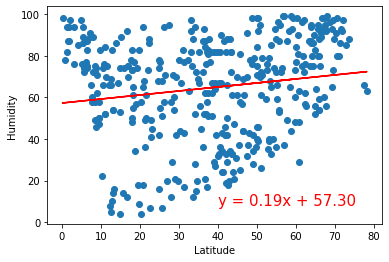

In [17]:
# Establish x value and find St. Pearson Correlation Coefficient for Humidity
north_hum = north_hem["Humidity"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_hum)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Humidity"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (40,8), fontsize=15, color="r")
plt.savefig("../Images/north_hum_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07


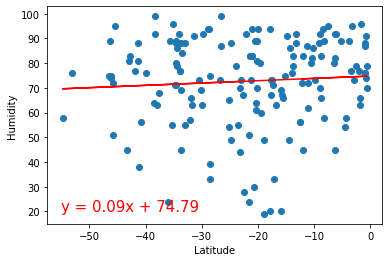

In [18]:
# Establish x value and find St. Pearson Correlation Coefficient for Humidity
south_hum = south_hem["Humidity"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_hum)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_hum)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Humidity"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (-55,20), fontsize=15, color="r")
plt.savefig("../Images/south_hum_lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.86


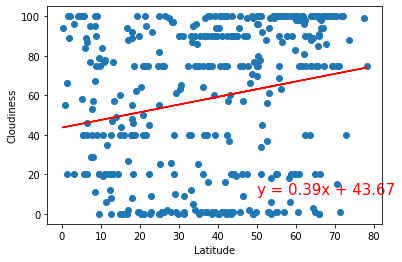

In [19]:
# Establish x value and find St. Pearson Correlation Coefficient for Cloudiness
north_cloud = north_hem["Cloudiness"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_cloud)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Cloudiness"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation, (50,10), fontsize=15, color="r")
plt.savefig("../Images/north_cloud_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.74


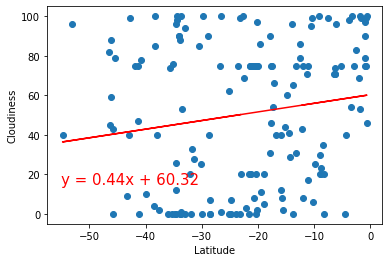

In [20]:
# Establish x value and find St. Pearson Correlation Coefficient for Cloudiness
south_cloud = south_hem["Cloudiness"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_cloud)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Cloudiness"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation, (-55,15), fontsize=15, color="r")
plt.savefig("../Images/south_cloud_lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.86


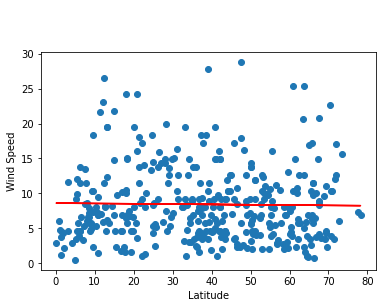

In [21]:
# Establish x value and find St. Pearson Correlation Coefficient for Wind Speed
north_spd = north_hem["Wind Speed"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_spd)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Wind Speed"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation, (0,35), fontsize=15, color="r")
plt.savefig("../Images/north_speed_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.74


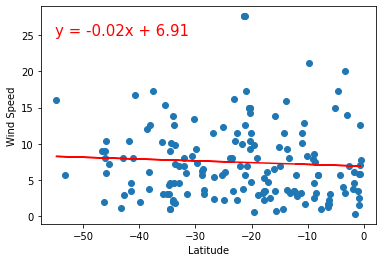

In [22]:
# Establish x value and find St. Pearson Correlation Coefficient for Wind Speed
south_spd = south_hem["Wind Speed"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_spd)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Wind Speed"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation, (-55,25), fontsize=15, color="r")
plt.savefig("../Images/south_speed_lat.png")
plt.show()